# **Imports**

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
from itertools import combinations
from networkx.readwrite import json_graph
import json

# Define constants for the graph
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"

SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400

EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24

MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# **Activity 2**

## **2.1 Sub-activity: Graph creation**

### **Task 1**

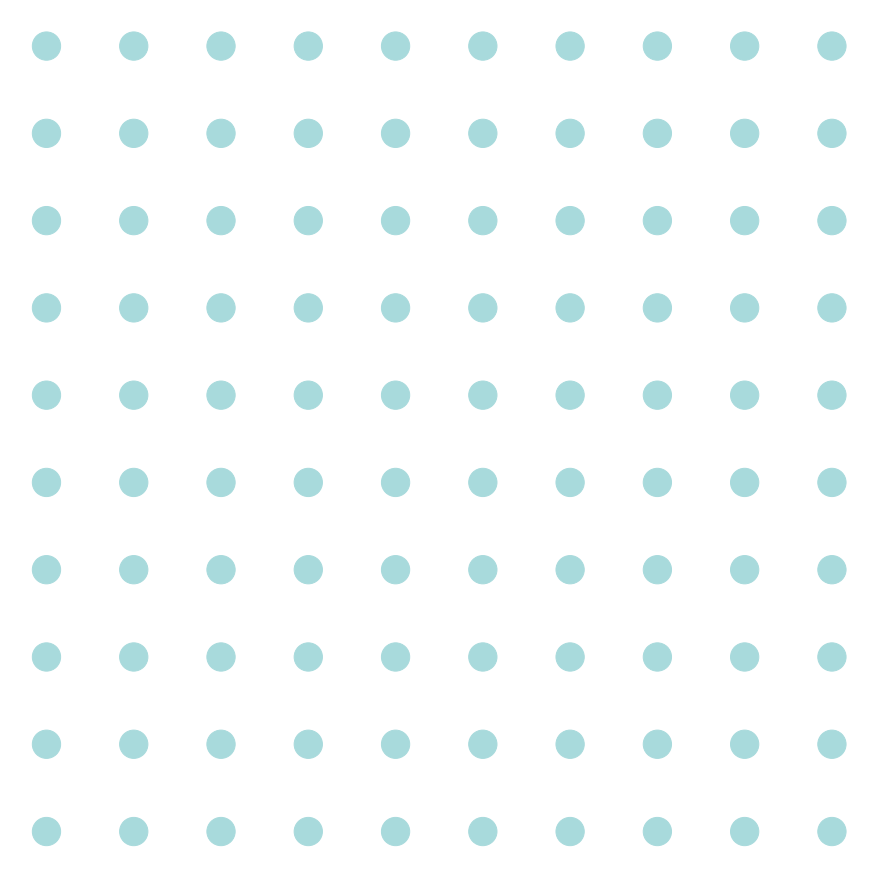

In [2]:
# Build three empty lists for nodes
# The nodes name and position are represented in (i, j). (i,j) are the combination of two numbers from the sequence of MATRIX_SIDE.
# Background nodes list
BG_node = []

# Foreground nodes list
FG_node = []

# Node position list
position = [] 
for i in range(MATRIX_SIDE):
  for j in range(MATRIX_SIDE):
    bg = (i,j)
    fg = (i,j)
    pos = (i,j)

    BG_node.append(bg)
    FG_node.append(fg)
    position.append(pos)

# Create a graph for background nodes
plt.figure(figsize=FIG_SIZE)
G = nx.Graph()

# Add background node on specific position with unique identifier
for i in range(len(BG_node)):
  G.add_node(BG_node[i], pos=BG_node[i], color=COLOR_BG, size=SIZE_BG_NODES)

# Set attributes
positions = nx.get_node_attributes(G,'pos')
color = nx.get_node_attributes(G, "color").values()
mysize = list(nx.get_node_attributes(G, "size").values())

nx.draw(G, pos = positions,
                 with_labels = False,
                 node_color = color,
                 node_size = mysize)

### **Task 2**

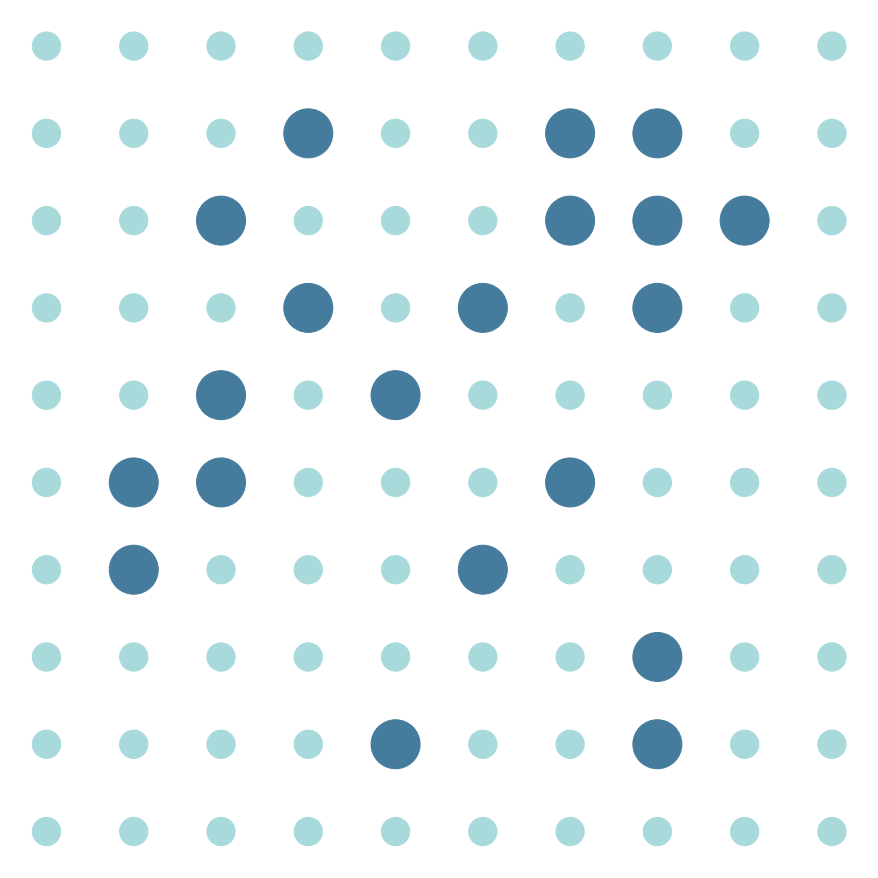

In [3]:
# Build three empty lists for nodes again to make sure each time we can run Task 2 only to get random foreground nodes.
# Background nodes list
BG_node = []

# Foreground nodes list
FG_node = []

# Node position list
position = [] 
for i in range(MATRIX_SIDE):
  for j in range(MATRIX_SIDE):
    bg = (i,j)
    fg = (i,j)
    pos = (i,j)

    BG_node.append(bg)
    FG_node.append(fg)
    position.append(pos)

# Build a border list for foreground node to avoid nodes located on the borders
# The list contains the nodes in the first and the last row and column only
border = []

for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        if(i == 0 or i == MATRIX_SIDE - 1 or j == 0 or j == MATRIX_SIDE - 1):
            border.append((i,j))
        else:
            continue

# Remove the foreground nodes which are in the border list
for item in border:
  if item in FG_node:
    FG_node.remove(item)

# Choose NO_FG_NODES foreground nodes randomly from foreground node list
FG_node = list(random.sample(FG_node, NO_FG_NODES))

# Remove selected foreground nodes from background node list
for item in FG_node:
  if item in BG_node:
    BG_node.remove(item)

# Create a graph
plt.figure(figsize=FIG_SIZE)
G = nx.Graph()

# Add nodes on specific position with unique name
# Set different color and size for different types of nodes
# Background nodes
for i in range(len(BG_node)):
  G.add_node(BG_node[i], pos=BG_node[i], color=COLOR_BG, size=SIZE_BG_NODES)

# Foreground nodes
for i in range(len(FG_node)):
  G.add_node(FG_node[i], pos=FG_node[i], color=COLOR_FG, size=SIZE_FG_NODES)

# Set attributes
positions = nx.get_node_attributes(G,'pos')
color = nx.get_node_attributes(G, "color").values()
mysize = list(nx.get_node_attributes(G, "size").values())

nx.draw(G, pos = positions,
                 with_labels = False,
                 node_color = color,
                 node_size = mysize)

### **Task 3**

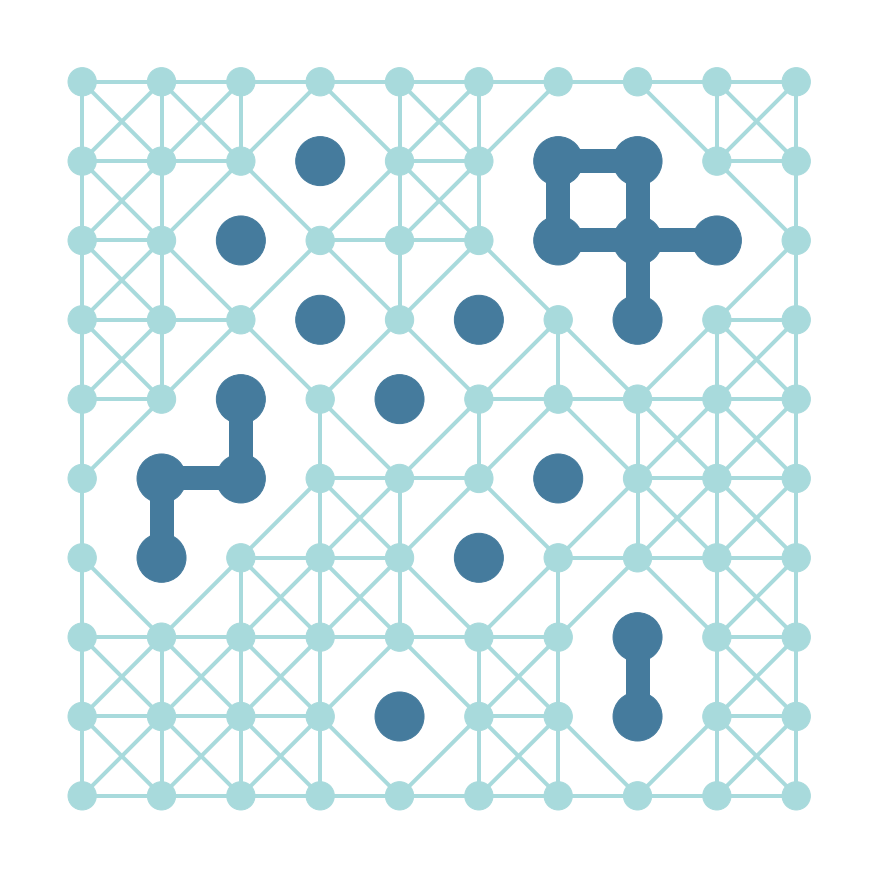

In [4]:
# Make a edge list for all background nodes
link = []

# Get all of the combinations of 2 elements in the background nodes list
# The list is used to decide which nodes are connected together
for subset in combinations(BG_node, 2):
    link.append(subset)

# Edge list for all foreground nodes
link_fg = []

# Get all of the combinations of 2 elements in the foreground nodes list
# The list is used to decide which nodes are connected togerther
for subset in combinations(FG_node, 2):
    link_fg.append(subset)

# Choose items from edge list "link" for the background nodes that can connect with all of their neighbours
edge_list = []
for item in range(len(link)):
  # Calculate the distance in x-axis and y-axis
  a = abs(link[item][0][0] - link[item][1][0])
  b = abs(link[item][0][1] - link[item][1][1])
  if a+b<=2 and (a<2 and b<2):
    edge_list.append(link[item])

# Choose items from edge list "link_fg" for the foreground nodes that can connect with their vertical and horizontal neighbours only.
edge_list_fg = []
for item in range(len(link_fg)):
  # Calculate the distance in x-axis and y-axis
  a = abs(link_fg[item][0][0] - link_fg[item][1][0])
  b = abs(link_fg[item][0][1] - link_fg[item][1][1])
  
  # The sum of distance must be equal or smaller than 1
  if a+b<=1:
    edge_list_fg.append(link_fg[item])

# Create a graph
plt.figure(figsize=FIG_SIZE)
G = nx.Graph()

# Add nodes
for i in range(len(BG_node)):
  G.add_node(BG_node[i], pos=BG_node[i], color=COLOR_BG, size=SIZE_BG_NODES)

for i in range(len(FG_node)):
  G.add_node(FG_node[i], pos=FG_node[i], color=COLOR_FG, size=SIZE_FG_NODES)

# Add edges
for i in range(len(edge_list)):
  G.add_edge(edge_list[i][0], edge_list[i][1], color=COLOR_BG, width=EDGE_BG_WEIGHT)

for i in range(len(edge_list_fg)):
  G.add_edge(edge_list_fg[i][0], edge_list_fg[i][1], color=COLOR_FG, width=EDGE_FG_WEIGHT)

# Set attributes
positions = nx.get_node_attributes(G,'pos')
color = nx.get_node_attributes(G, "color").values()
mysize = list(nx.get_node_attributes(G, "size").values())
width_edge = list(nx.get_edge_attributes(G, "width").values())
color_edge = nx.get_edge_attributes(G, "color").values()

nx.draw(G, pos = positions,
        with_labels = False,
        node_color = color,
        node_size = mysize,
        edge_color = color_edge,
        width = width_edge)

## **2.2 Sub-activity: Graph manipulation and output**

### **Task 4**

In [5]:
# Print the graph info
print(nx.info(G))

# Print the density of the graph
print(nx.density(G))

# Print the degree centrality of nodes
print(nx.degree_centrality(G))

Graph with 100 nodes and 216 edges
0.04363636363636364
{(0, 0): 0.030303030303030304, (0, 1): 0.05050505050505051, (0, 2): 0.04040404040404041, (0, 3): 0.030303030303030304, (0, 4): 0.030303030303030304, (0, 5): 0.04040404040404041, (0, 6): 0.05050505050505051, (0, 7): 0.05050505050505051, (0, 8): 0.05050505050505051, (0, 9): 0.030303030303030304, (1, 0): 0.05050505050505051, (1, 1): 0.08080808080808081, (1, 2): 0.07070707070707072, (1, 5): 0.05050505050505051, (1, 6): 0.06060606060606061, (1, 7): 0.07070707070707072, (1, 8): 0.07070707070707072, (1, 9): 0.05050505050505051, (2, 0): 0.05050505050505051, (2, 1): 0.08080808080808081, (2, 2): 0.07070707070707072, (2, 3): 0.05050505050505051, (2, 6): 0.05050505050505051, (2, 8): 0.06060606060606061, (2, 9): 0.04040404040404041, (3, 0): 0.04040404040404041, (3, 1): 0.07070707070707072, (3, 2): 0.07070707070707072, (3, 3): 0.07070707070707072, (3, 4): 0.05050505050505051, (3, 5): 0.04040404040404041, (3, 7): 0.05050505050505051, (3, 9): 0.04

### **Task 5**

In [6]:
# Export the graph in json file
my_graph = json_graph.node_link_data(G)

with open('graph.json', 'w') as outfile:
    json.dump(my_graph, outfile,indent=-3)

# Opening JSON file
f = open('graph.json')
 
# Returns JSON object as a dictionary
data = json.load(f)
data

{'directed': False,
 'graph': {},
 'links': [{'color': '#a8dadc',
   'source': [0, 0],
   'target': [0, 1],
   'width': 4},
  {'color': '#a8dadc', 'source': [0, 0], 'target': [1, 0], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 0], 'target': [1, 1], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 1], 'target': [0, 2], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 1], 'target': [1, 0], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 1], 'target': [1, 1], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 1], 'target': [1, 2], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 2], 'target': [0, 3], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 2], 'target': [1, 1], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 2], 'target': [1, 2], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 3], 'target': [0, 4], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 3], 'target': [1, 2], 'width': 4},
  {'color': '#a8dadc', 'source': [0, 4], 'target': [0, 5], 'width': 4},
  {'color': 